---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 6

---
Please write your full name here
- **Name** : "Alaa Yasser Mahmoud"

# Part 1 PCA

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


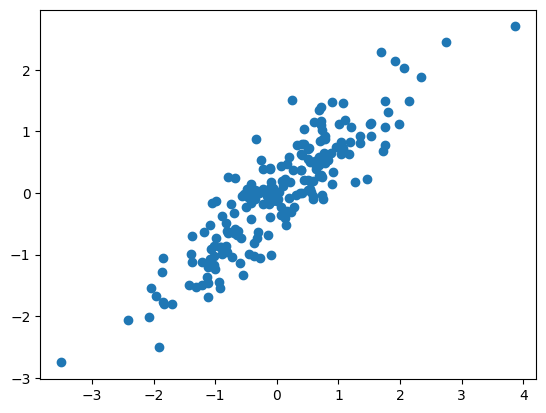

In [ ]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [ ]:
#### YOUR FUNCTION
def pca(X):
    #mean
    x_mean= np.mean(X, axis= 0)
    X= X-x_mean
    #covarience
    covarience = np.cov(X.T)
    #eigen vectors & values
    eigen_val , eigen_vec = np.linalg.eig(covarience)
    # sorting vectors
    sorted_index = np.argsort(eigen_val.T)[::-1]
    sorted_eigenvalue = eigen_val[sorted_index]
    sorted_eigenvectors= eigen_vec[sorted_index]
    #transform
    X_transformed= np.dot(X, sorted_eigenvectors.T)

    return sorted_eigenvectors, sorted_eigenvalue, X_transformed

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA vectors over the ORIGINAL data

In [ ]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalues, X_transformed = pca(X)

In [ ]:
print("Eigenvalues are: ", sorted_eigenvalues)

Eigenvalues are:  [1.82927343 0.10246373]


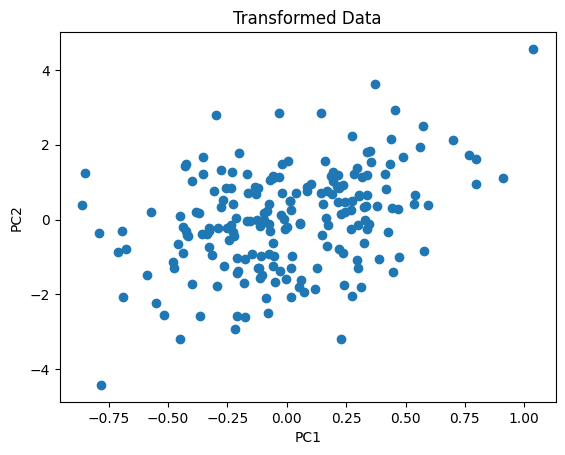

In [ ]:
### Plot transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Transformed Data')
plt.show()

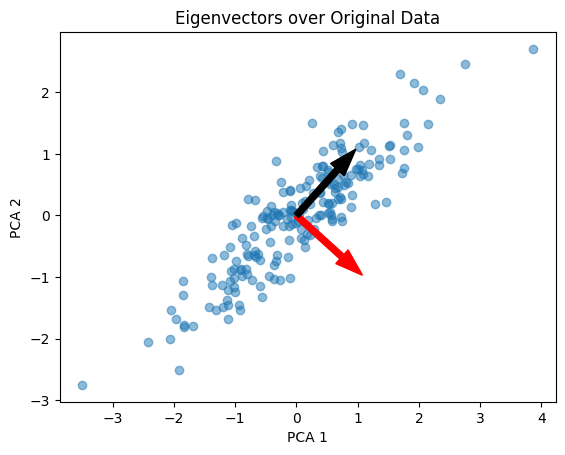

In [ ]:
### Plot eigenvectors over ORIGINAL data
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

# Plot the first eigenvector as a red arrow
plt.arrow(0, 0,sorted_eigenvectors[0, 0], sorted_eigenvectors[0, 1], color='r', width=0.1)
# Plot the second eigenvector as a green arrow
plt.arrow(0, 0, sorted_eigenvectors[1, 0], sorted_eigenvectors[1, 1], color='black', width=0.1)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Eigenvectors over Original Data')
plt.show()

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

sklearn_eigenvectors = pca.components_
sklearn_eigenvalues = pca.explained_variance_
X_transformed = pca.transform(X)

print('Eigenvalues:')
print(sklearn_eigenvalues)



Eigenvalues:
[1.82927343 0.10246373]


## Question 4
- Appl sklearn PCA using 1 component only
- print shape of transformed data
- plot the transformed data

In [ ]:
pca_one_component = PCA(n_components=1)
pca_one_component.fit(X)

X_transformed_one_component = pca_one_component.transform(X)

print('Shape of transformed data:', X_transformed_one_component.shape)

Shape of transformed data: (200, 1)


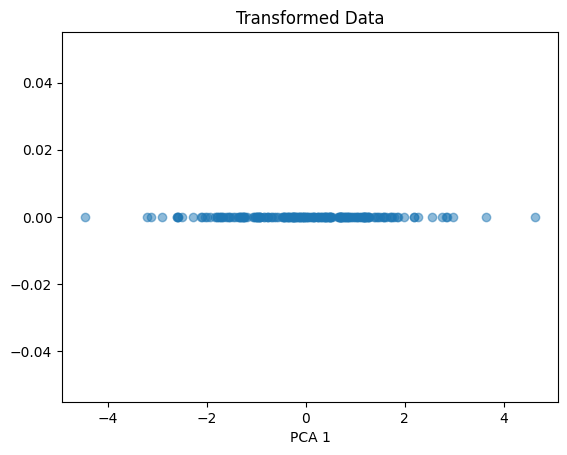

In [ ]:
plt.scatter(X_transformed_one_component[:, 0], np.zeros(X_transformed_one_component.shape[0]), alpha=0.5)
plt.xlabel('PCA 1')
plt.title('Transformed Data')
plt.show()

# Part 2 SVM

### Use the following function to plot the classification regions

In [ ]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=42 and 20% of the data for testing)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Question 2
1. Train an SVM classifier using linear kernel (use SVC)
2. Plot the classification regions using the training dataset.

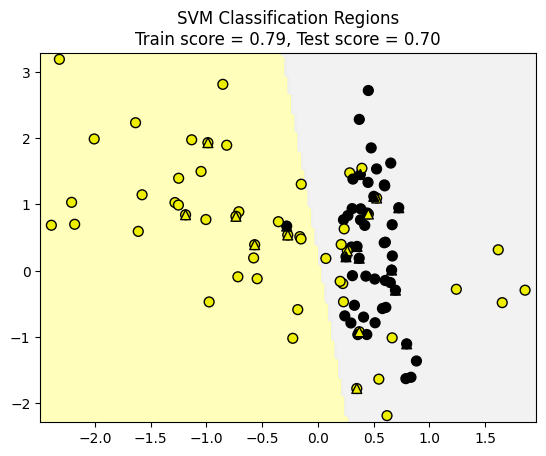

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

plot_class_regions_for_classifier(svm, X, y, X_test, y_test, title='SVM Classification Regions')


#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00002.
2. Train another SVM classifier using linear kernel with C=200
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

`when C=0.00002 there is almost no decision boundary and is not able to seprate the 2 classes.`
 `a small value of C places => high penalty on misclassified samples => more errors in the decision boundary.`

In [ ]:
from sklearn.svm import SVC

# Assuming you already have `X_train`, `X_test`, `y_train`, and `y_test` defined

# Train an SVM classifier with a linear kernel and C=0.00002
svm1 = SVC(kernel='linear', C=0.00002)
svm1.fit(X_train, y_train)

# Train an SVM classifier with a linear kernel and C=200
svm2 = SVC(kernel='linear', C=200)
svm2.fit(X_train, y_train)

SVC(C=200, kernel='linear')

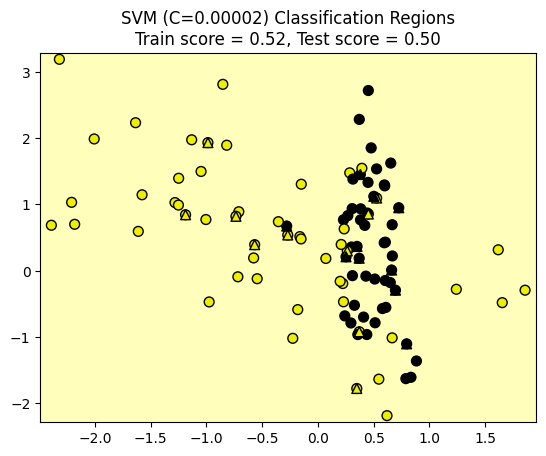

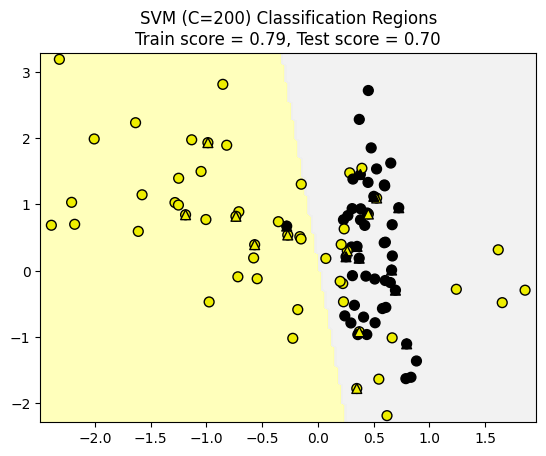

In [ ]:

plot_class_regions_for_classifier(svm1, X, y, X_test, y_test, title='SVM (C=0.00002) Classification Regions')

plot_class_regions_for_classifier(svm2, X, y, X_test, y_test, title='SVM (C=200) Classification Regions')

plt.show()


### Use the fruits dataset in questions 4, 5, 6.

In [ ]:
import pandas as pd
fruits = pd.read_csv('Alaa hameed - fruit_data_with_colors.txt', delimiter='\t')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=42, and 20% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm using random_state=42, C=10

In [ ]:
X_fruits = fruits[['height', 'width']]
y_fruits = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=42, test_size=0.2)



In [ ]:
from sklearn.svm import LinearSVC
svm_fruit = LinearSVC(C=10, random_state=42)
svm_fruit.fit(X_train, y_train)

c:\Users\Alaa Yasser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, random_state=42)

#### Question 5
For the previous model from question 4.
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

`As we use the sklearn built in svm model ,we interact with one model .. but behind the scenes this is a binary classification, it uses one vs all approach: trains a model to distinguish each class from others and combines the results to give the final desion .. as it resulted in 3 regions so it trained 3 models internally (with the same C and kernel function)`

In [ ]:
print("Coefficients: ", svm_fruit.coef_)
print("Intercept: ", svm_fruit.intercept_)

Coefficients:  [[-0.22459715  0.76048347]
 [-1.70338354  1.18717003]
 [-0.0062549   0.3183943 ]
 [ 1.14746624 -1.71656282]]
Intercept:  [-3.42751628  1.46849592 -3.01719598  1.66954999]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

c:\Users\Alaa Yasser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


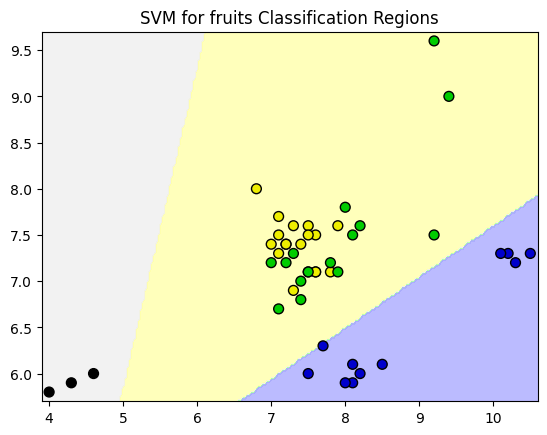

In [ ]:
plot_class_regions_for_classifier(svm_fruit, X_train.values, y_train.values, title='SVM for fruits Classification Regions')

In [ ]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 42, and 20% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM  (SVC) classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, random_state=42, test_size=0.2)

parameters = {'kernel': ('poly', 'rbf'), 'C': [0.01, 0.1, 0.5, 1, 10]}
svc_cancer = SVC()
clf = GridSearchCV(svc_cancer, parameters)
clf.fit(X_cancer_train, y_cancer_train)

print("Best C value: ", clf.best_params_['C'])

Best C value:  10


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [ ]:
svm_cancer = SVC(kernel='rbf', C=10)
svm_cancer.fit(X_cancer_train, y_cancer_train)

# Calculating the training and testing accuracy
train_acc = svm_cancer.score(X_cancer_train, y_cancer_train)
test_acc = svm_cancer.score(X_cancer_test, y_cancer_test)

print('Accuracy of SVC on training set: {:.2f}'
     .format(train_acc))
print('Accuracy of SVC on test set: {:.2f}'
     .format(test_acc))

Accuracy of SVC on training set: 0.92
Accuracy of SVC on test set: 0.95


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

`I made a small research and decided to scale the features so that they have zero mean and unit variance .. to prevent assigning too much importance(weights) to features with larger scales, and ignoring features with smaller scales.`

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer)

X_cancer_scaled_train, X_cancer_scaled_test, y_cancer_scaled_train, y_cancer_scaled_test = train_test_split(X_cancer_scaled, y_cancer, test_size=0.2, random_state=42)

# without modifing the model, If I can modify it I would rechoose the hyperparameters using grid search
svm_cancer_scaled = SVC(kernel='rbf', C=10)
svm_cancer_scaled.fit(X_cancer_scaled_train, y_cancer_scaled_train)

SVC(C=10)

In [ ]:
print('Accuracy of SVC on training set: {:.2f}'
     .format(svm_cancer_scaled.score(X_cancer_scaled_train, y_cancer_scaled_train)))
print('Accuracy of SVC on test set: {:.2f}'
     .format(svm_cancer_scaled.score(X_cancer_scaled_test, y_cancer_scaled_test)))

Accuracy of SVC on training set: 0.99
Accuracy of SVC on test set: 0.97
